# Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constant

In [4]:
DATASET_TEMP = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv"
DATASET_TEMP_STATE = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv"
DATASET_TEMP_COUNTRY = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv"
DATASET_TEMP_CITY = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv"
DATASET_TEMP_MJR_CITY = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv"

# Code

In [7]:
df_temp_global_city = pd.read_csv(DATASET_TEMP_CITY)
df_temp_global_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


### 1. Check central tendency

In [8]:
central_tendency = df_temp_global_city[['AverageTemperature', 'AverageTemperatureUncertainty']].describe()
central_tendency

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


### 2. Perform Outlier Analysis

In [9]:
# Calculate IQR for AverageTemperature
Q1 = df_temp_global_city['AverageTemperature'].quantile(0.25)
Q3 = df_temp_global_city['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_temp_global_city[(df_temp_global_city['AverageTemperature'] < lower_bound) | (df_temp_global_city['AverageTemperature'] > upper_bound)]
outliers

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
9611,1820-12-01,-16.126,2.890,Öskemen,Kazakhstan,50.63N,82.39E
9612,1821-01-01,-15.276,2.934,Öskemen,Kazakhstan,50.63N,82.39E
9613,1821-02-01,-13.576,2.896,Öskemen,Kazakhstan,50.63N,82.39E
9623,1821-12-01,-14.623,3.059,Öskemen,Kazakhstan,50.63N,82.39E
9624,1822-01-01,-16.796,2.897,Öskemen,Kazakhstan,50.63N,82.39E
...,...,...,...,...,...,...,...
8578925,2011-02-01,-16.489,0.392,Zlatoust,Russia,55.45N,59.53E
8578936,2012-01-01,-14.325,0.524,Zlatoust,Russia,55.45N,59.53E
8578937,2012-02-01,-15.932,0.403,Zlatoust,Russia,55.45N,59.53E
8578947,2012-12-01,-17.374,1.461,Zlatoust,Russia,55.45N,59.53E


### 3. Scatter Plot

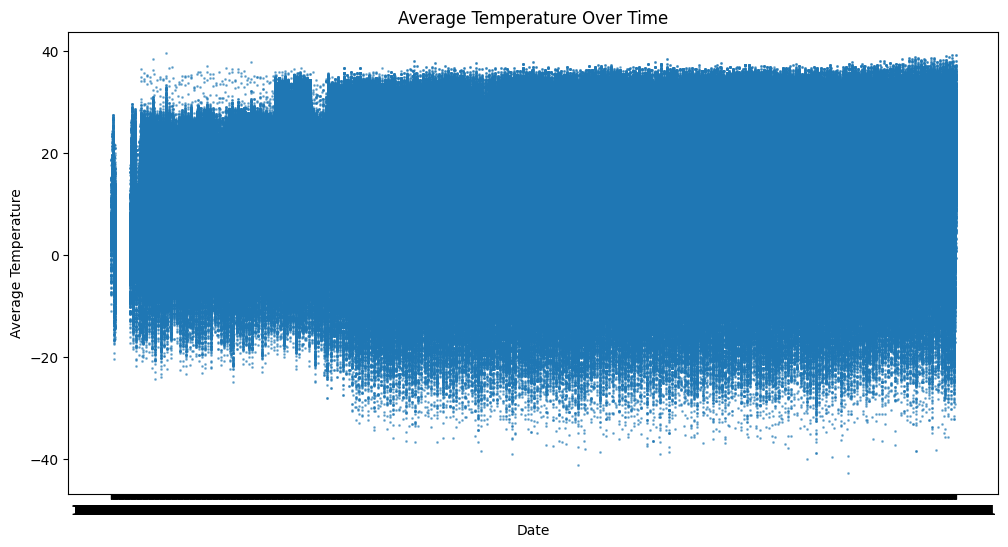

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(df_temp_global_city['dt'], df_temp_global_city['AverageTemperature'], alpha=0.5, s=1)
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()